In [1]:
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sns

In [2]:
# load dataset
dataset = read_csv('clean_data.csv', header=0, index_col=0)
dataset = df.loc[:,['Year','Life_Expectancy','Adult_Mortality','BMI']]
values = dataset.values
values

NameError: name 'df' is not defined

In [ ]:
df = read_csv('clean_data.csv')
dataset = df.loc[:,['Year','Life_Expectancy','Adult_Mortality','BMI']]
dataset.tail()

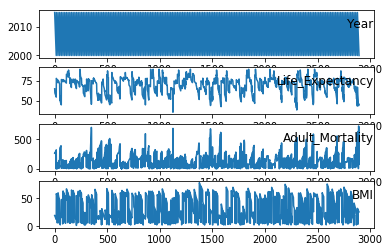

In [32]:
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import seaborn as sns
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


Using TensorFlow backend.


In [10]:
# load dataset
df = read_csv('clean_data.csv', header=0, index_col=0)
dataset = df.loc[:,['Year','Life_Expectancy','Adult_Mortality','BMI']]
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())
# print(values[:10])
# split into train and test sets
# from sklearn.model_selection import train_test_split
# values = reframed.values
# print(values[:10])
# y = dataset['Life_Expectancy']
# print(y.count())
# train_X, test_X, train_y, test_y = train_test_split(values, y, random_state=42)

values = reframed.values
n_train_hours = int(len(dataset['Year'])*.8)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   1.000000   0.544592   0.362881   0.231281  0.933334
2   0.933334   0.447818   0.373961   0.222962  0.866669
3   0.866669   0.447818   0.369806   0.214642  0.800003
4   0.800003   0.440228   0.375346   0.206323  0.733337
5   0.733337   0.434535   0.379501   0.199667  0.666656
(2316, 1, 4) (2316,) (579, 1, 4) (579,)


Train on 2316 samples, validate on 579 samples
Epoch 1/50
 - 3s - loss: 0.3990 - val_loss: 0.2929
Epoch 2/50
 - 0s - loss: 0.2475 - val_loss: 0.2212
Epoch 3/50
 - 0s - loss: 0.2140 - val_loss: 0.2061
Epoch 4/50
 - 0s - loss: 0.1970 - val_loss: 0.1874
Epoch 5/50
 - 0s - loss: 0.1762 - val_loss: 0.1632
Epoch 6/50
 - 0s - loss: 0.1482 - val_loss: 0.1294
Epoch 7/50
 - 0s - loss: 0.1078 - val_loss: 0.0808
Epoch 8/50
 - 0s - loss: 0.0748 - val_loss: 0.0725
Epoch 9/50
 - 0s - loss: 0.0725 - val_loss: 0.0732
Epoch 10/50
 - 0s - loss: 0.0724 - val_loss: 0.0732
Epoch 11/50
 - 0s - loss: 0.0720 - val_loss: 0.0722
Epoch 12/50
 - 0s - loss: 0.0715 - val_loss: 0.0717
Epoch 13/50
 - 0s - loss: 0.0712 - val_loss: 0.0714
Epoch 14/50
 - 0s - loss: 0.0708 - val_loss: 0.0706
Epoch 15/50
 - 0s - loss: 0.0705 - val_loss: 0.0703
Epoch 16/50
 - 0s - loss: 0.0701 - val_loss: 0.0701
Epoch 17/50
 - 0s - loss: 0.0699 - val_loss: 0.0697
Epoch 18/50
 - 0s - loss: 0.0696 - val_loss: 0.0694
Epoch 19/50
 - 0s - loss: 

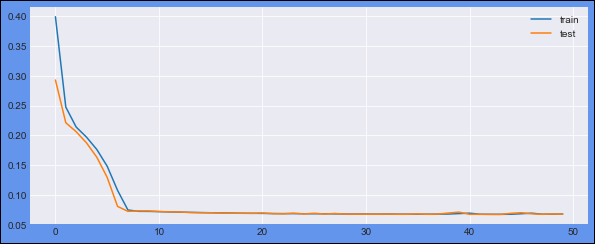

Test MSE: 15.784
Test RMSE: 3.973


In [11]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
sns.set_style('darkgrid')
fig = pyplot.figure(figsize=(10,4), edgecolor='black', facecolor='cornflowerblue',linewidth=1.5)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.savefig('images/LSTM.png',facecolor=fig.get_facecolor(),edgecolor=fig.get_edgecolor())
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = mean_squared_error(inv_y, inv_yhat)
rmse = sqrt(mse)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)

15.78436